<a href="https://colab.research.google.com/github/ywang1110/6300Fall21ywang257/blob/master/CS6603_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load/Explore the data

In [1]:
!pip install --upgrade matplotlib

In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
df.shape

(10127, 23)

# Step 1

1. Which dataset did you select?
  > https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

2. Which regulated domain does your dataset belong to?
  > Credit


3. How many observations are in the dataset?
  > 10127

4. How many variables are in the dataset?
  > 23
5. Which variables did you select as your dependent variables?
  > Attrition_Flag
  > Total_Revolving_Bal or Revolver Indicator
6. How many and which variables in the dataset are associated with a legally
recognized protected class? Which legal precedence/law (as discussed in the lectures) does each protected class fall under?

| Variable Name | Protected Class | Legal PrecedencLaw                          |
|----------------------|--------------------------|--------------------------------------------------------|
| Gender             | Sex                      | Equal Pay Act of 1963; Civil Rights Act of 1964, 1991  |
| Marital_Status        | Familial status          | Civil Rights Act of 1968                               |                            |
| Customer_Age             | Age                      | Age Discrimination in Employment Act of 1967           |



# Step 2

### 1. Table documenting the relationship between members and membership categories for each protected class variable (from Step 2.1)

| Protected Clas  | Member                | Member Categories          |
|-----------------|-----------------------|----------------------------|
| Sex             | Gender                | 1) M; 2) F |                           |
| Familial status | Marital_Status        | 1) Married; 2) Single; 3) Unknown;  4) Divorced |                                                  |
| Age             | Customer_Age          | 1) Under 40; 2) 40-60; 3) Over 60 |


In [6]:
def generate_subset(col_to_grouped, bin_edges, bin_labels, group_col_name):
  # Use the cut function to create a new categorical column based on the categories
  df[group_col_name] = pd.cut(df[col_to_grouped], bins=bin_edges, labels=age_labels)

  # To see the distribution in each category, you can use value_counts()
  group_distribution = df[group_col_name].value_counts()

  print(group_distribution)

In [7]:
# Customer_Age -> Age_Group
bin_edges = [0, 40, 60, float('inf')]
age_labels = ['Under 40', '40-60', 'Above 60']
generate_subset('Customer_Age', bin_edges, age_labels, 'Age_Group')

print('\n')

40-60       7325
Under 40    2397
Above 60     405
Name: Age_Group, dtype: int64




In [8]:
# group cols already added into dataframe
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Age_Group
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,40-60
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,40-60
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,40-60
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,Under 40
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,Under 40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,40-60
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,40-60
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,40-60
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,Under 40


### 2. Table documenting the relationship between values and discrete categories/numerical values associated with your dependent variables (from Step 2.2)

| Depedent variable   | categories |
|-------------------  |------------|
| Attrition_Flag      | 1) Existing Customer; 2) Attrited Customer |
| Total_Revolving_Bal | 1) Zero Bal; 2) Positive Bal

In [9]:
print('Total_Revolving_Bal = ' + str(df['Total_Revolving_Bal'].min()))
print('Total_Revolving_Bal = ' + str(df['Total_Revolving_Bal'].max()))

print('\nAttrition_Flag = ' + str(df['Attrition_Flag'].unique()))

Total_Revolving_Bal = 0
Total_Revolving_Bal = 2517

Attrition_Flag = ['Existing Customer' 'Attrited Customer']


In [10]:
df['Total_Revolving_Bal_Group'] = df['Total_Revolving_Bal'].apply(lambda x: 'Zero Bal' if x == 0 else 'Positive Bal')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Age_Group,Total_Revolving_Bal_Group
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,40-60,Positive Bal
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,40-60,Positive Bal
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,40-60,Zero Bal
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,Under 40,Positive Bal
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,Under 40,Zero Bal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,40-60,Positive Bal
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,40-60,Positive Bal
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,40-60,Zero Bal
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,Under 40,Zero Bal


### 3. Table providing the computed frequency values for the membership categories each protected class variable (from Step 2.3)

1) Sex

| Catrgory  | Frequency  |
|---------- | -----------|
| F         | 5358       |
| M         | 4769       |


2) Marital_Status

| Catrgory      | Frequency  |
|---------------| -----------|
| Married       | 4687       |
| Single        | 3943       |
| Unknown       | 749        |
| Divorced      | 748        |

3) Age

| Catrgory      | Frequency  |
|---------------| -----------|
| Under 40      | 2397       |
| 40-60         | 7325       |
| Above 60      | 405        |


In [11]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [12]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [13]:
df['Age_Group'].value_counts()

40-60       7325
Under 40    2397
Above 60     405
Name: Age_Group, dtype: int64

### 4. Histograms derived from Step 2.4



In [14]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Age_Group,Total_Revolving_Bal_Group
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,40-60,Positive Bal
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,40-60,Positive Bal
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,40-60,Zero Bal
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,Under 40,Positive Bal
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,Under 40,Zero Bal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,40-60,Positive Bal
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,40-60,Positive Bal
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,40-60,Zero Bal
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,Under 40,Zero Bal


In [15]:
def plot_histogram_category_Depedent(category_group_col, dependent_col):
  grouped_data = df.groupby(category_group_col)[dependent_col].value_counts(normalize=False)
  pivot_data = grouped_data.unstack()
  pivot_data.plot(kind='bar', width=0.8)
  plt.ylabel('Frequency')  # Set the y-axis label
  plt.title(category_group_col + ' Vs. ' + dependent_col)  # Set the title of the chart
  plt.legend(title='Protected_Class', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=len(pivot_data.columns))

  plt.tight_layout()
  plt.xlabel('')
  plt.xticks(rotation=0)

  plt.show()

#### 1-1) Gender vs. Attrition_Flag

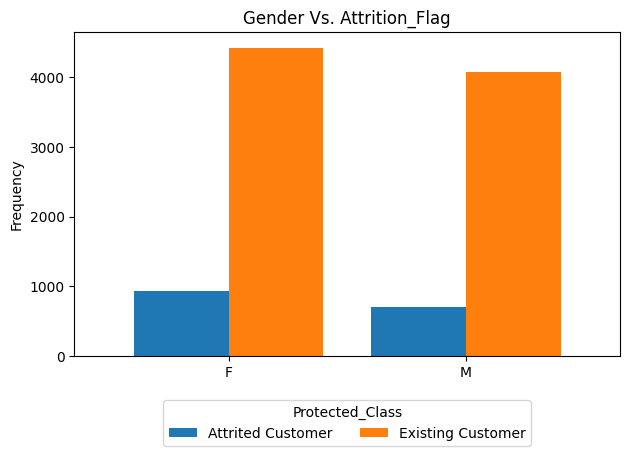

In [16]:
plot_histogram_category_Depedent('Gender', 'Attrition_Flag')

#### 1-2) Marital_Status vs. Attrition_Flag

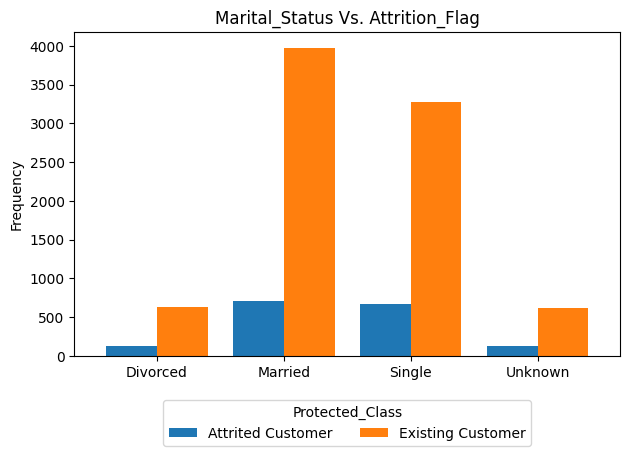

In [17]:
plot_histogram_category_Depedent('Marital_Status', 'Attrition_Flag')

#### 1-3) Age_Group vs. Attrition_Flag

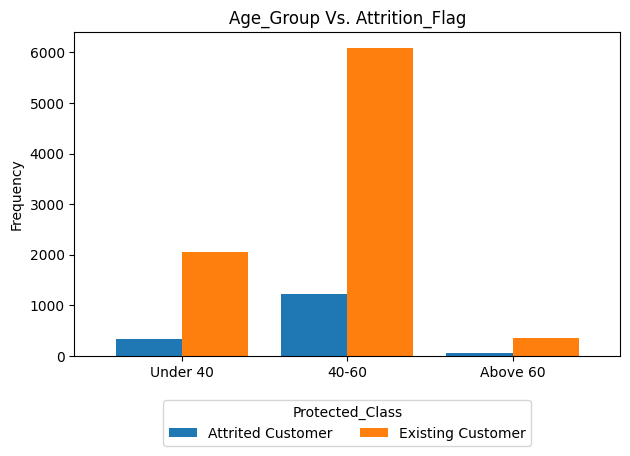

In [18]:
plot_histogram_category_Depedent('Age_Group', 'Attrition_Flag')

#### 2-1) Gender vs. Total_Revolving_Bal_Group

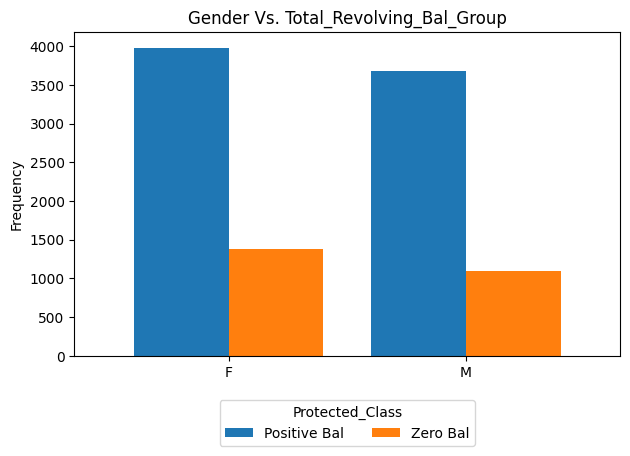

In [19]:
plot_histogram_category_Depedent('Gender', 'Total_Revolving_Bal_Group')

#### 2-2) Marital_Status vs. Total_Revolving_Bal_Group

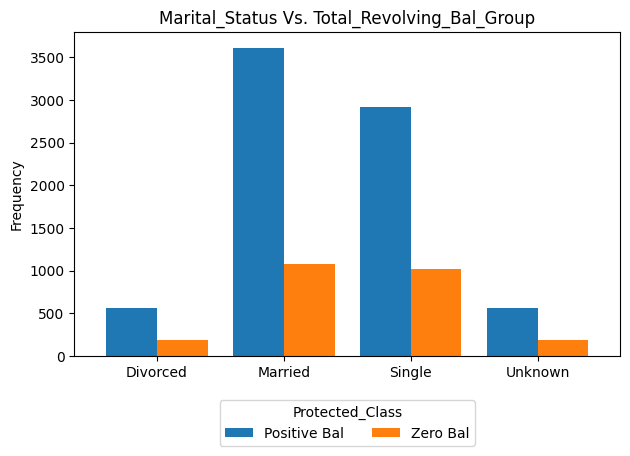

In [20]:
plot_histogram_category_Depedent('Marital_Status', 'Total_Revolving_Bal_Group')

#### 2-3) Age_Group vs. Total_Revolving_Bal_Group

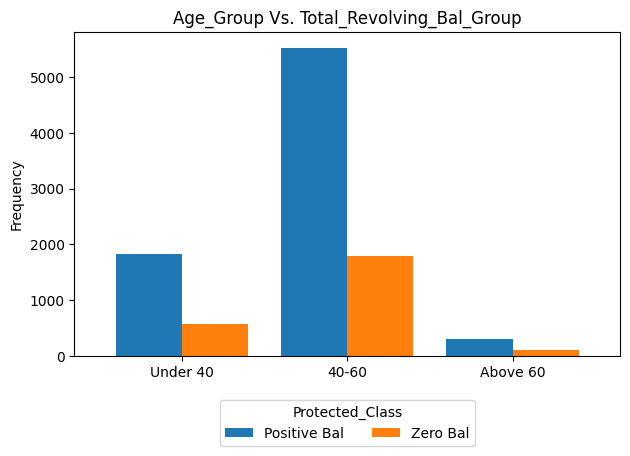

In [21]:
plot_histogram_category_Depedent('Age_Group', 'Total_Revolving_Bal_Group')

# Step 3

#3.1 Privileged Group and Unprivileged Group
## 1.Gender:
### Privileged Group: F
### Unprivileged Group: M
## 2.Marital_Status:
###Privileged Group: Single
###Unprivileged Group: Other
## 3.Age:
###Privileged Group: >40
###Unprivileged Group: <=40

In [22]:
!pip install aif360

In [23]:
#Metrics By Hongyu Zhang
#1. Statistical Parity Difference https://aif360.readthedocs.io/en/latest/modules/generated/aif360.sklearn.metrics.statistical_parity_difference.html
#2. Disparate Impact Ratio https://aif360.readthedocs.io/en/latest/modules/generated/aif360.sklearn.metrics.disparate_impact_ratio.html
from aif360.sklearn import metrics

In [24]:
df = pd.read_csv('/content/drive/MyDrive/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [25]:
#Transform Dependent Variables and Protected attributes From Text to Number: HZ
df['Attrition_Flag_Ind']=df['Attrition_Flag'].apply(lambda x: 1 if x=='Attrited Customer' else 0)
df['Revolving_Ind']=df['Total_Revolving_Bal'].apply(lambda x: 1 if x>0 else 0)
df['Gender']=df['Gender'].apply(lambda x: 1 if x=='F' else 0)
df['Age']=df['Customer_Age'].apply(lambda x: 1 if x>40 else 0)
df['Marital_Status']=df['Marital_Status'].apply(lambda x:1 if x=='Single' else 0)

# Attrition Flag Ind
Since the attrition rate is only 16% in the whole population, we think if the attrition rate of privileged groups is 10% more than attrition rate of unprivileged groups, there is bias existing. For Statistical Parity Difference, we set the threshold as +-0.8%. For the Disparate Impact Ratio, we set the threshold as 0.9 to 1.1.

In [26]:
#Dependent Variable: Attrition Flag Ind
#Protected Class: Gender
spd=metrics.statistical_parity_difference(df.Attrition_Flag_Ind,prot_attr=df.Gender,priv_group=1)
dir=metrics.disparate_impact_ratio(df.Attrition_Flag_Ind,prot_attr=df.Gender,priv_group=1)
print(spd,dir)

-0.027419995270876185 0.842025446600694


In [27]:
#Dependent Variable: Attrition Flag Ind
#Protected Class: Marital Status
spd=metrics.statistical_parity_difference(df.Attrition_Flag_Ind,prot_attr=df.Marital_Status,priv_group=1)
dir=metrics.disparate_impact_ratio(df.Attrition_Flag_Ind,prot_attr=df.Marital_Status,priv_group=1)
print(spd,dir)

-0.01433653199752355 0.915375829840965


In [28]:
#Dependent Variable: Attrition Flag Ind
#Protected Class: Age
spd=metrics.statistical_parity_difference(df.Attrition_Flag_Ind,prot_attr=df.Age,priv_group=1)
dir=metrics.disparate_impact_ratio(df.Attrition_Flag_Ind,prot_attr=df.Age,priv_group=1)
print(spd,dir)

-0.023557098378147318 0.8582907622855418


# Revolving Ind
Since the revolving rate is 25% in the whole population, we think if the revolving rate of privileged groups is 10% more than the revolving rate of unprivileged groups, there is bias existing. For Statistical Parity Difference, we set the threshold as +-1.25%. For the Disparate Impact Ratio, we set the threshold as 0.9 to 1.1.

In [29]:
#Dependent Variable: Revolving Ind
#Protected Class: Gender
spd=metrics.statistical_parity_difference(df.Revolving_Ind,prot_attr=df.Gender,priv_group=1)
dir=metrics.disparate_impact_ratio(df.Revolving_Ind,prot_attr=df.Gender,priv_group=1)
print(spd,dir)

0.02741404668745695 1.0368871075216963


In [30]:
#Dependent Variable: Revolving Ind
#Protected Class: Marital Status
spd=metrics.statistical_parity_difference(df.Revolving_Ind,prot_attr=df.Marital_Status,priv_group=1)
dir=metrics.disparate_impact_ratio(df.Revolving_Ind,prot_attr=df.Marital_Status,priv_group=1)
print(spd,dir)

0.024625533844345293 1.033230143719457


In [31]:
#Dependent Variable: Revolving Ind
#Protected Class: Age
spd=metrics.statistical_parity_difference(df.Revolving_Ind,prot_attr=df.Age,priv_group=1)
dir=metrics.disparate_impact_ratio(df.Revolving_Ind,prot_attr=df.Age,priv_group=1)
print(spd,dir)

0.003625920930701909 1.0048010224039612


In [32]:
#!pip install 'aif360[LawSchoolGPA]'
#!pip install 'aif360[Reductions]'

In [33]:
from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.datasets import BinaryLabelDataset

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [34]:
keep_list=['Gender','Age','Marital_Status','Dependent_count',
       #    'Education_Level','Income_Category', 'Card_Category',
           'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_Ind','Revolving_Ind']

In [35]:
binary_data=BinaryLabelDataset(df=df[keep_list],label_names=['Attrition_Flag_Ind'],protected_attribute_names=['Gender','Age','Marital_Status'])

In [36]:
!pip install BlackBoxAuditing

In [37]:
DIR=DisparateImpactRemover()

In [38]:
mitigated_binary_data=DIR.fit_transform(binary_data)

In [39]:
mitigated_df=mitigated_binary_data.convert_to_dataframe()[0]

In [40]:
#Dependent Variable: Attrition Flag Ind
#Protected Class: Gender
spd=metrics.statistical_parity_difference(mitigated_df.Attrition_Flag_Ind,prot_attr=mitigated_df.Gender,priv_group=1)
dir=metrics.disparate_impact_ratio(mitigated_df.Attrition_Flag_Ind,prot_attr=mitigated_df.Gender,priv_group=1)
print(spd,dir)

-0.027419995270876185 0.842025446600694


No Change is fine: https://edstem.org/us/courses/38311/discussion/3245656

In [41]:
#Dependent Variable: Attrition Flag Ind
#Protected Class: Marital Status
spd=metrics.statistical_parity_difference(mitigated_df.Attrition_Flag_Ind,prot_attr=mitigated_df.Marital_Status,priv_group=1)
dir=metrics.disparate_impact_ratio(mitigated_df.Attrition_Flag_Ind,prot_attr=mitigated_df.Marital_Status,priv_group=1)
print(spd,dir)

-0.01433653199752355 0.915375829840965


In [42]:
#Dependent Variable: Attrition Flag Ind
#Protected Class: Age
spd=metrics.statistical_parity_difference(mitigated_df.Attrition_Flag_Ind,prot_attr=mitigated_df.Age,priv_group=1)
dir=metrics.disparate_impact_ratio(mitigated_df.Attrition_Flag_Ind,prot_attr=mitigated_df.Age,priv_group=1)
print(spd,dir)

-0.023557098378147318 0.8582907622855418


In [43]:
#Dependent Variable: Revolving Ind
#Protected Class: Gender
spd=metrics.statistical_parity_difference(mitigated_df.Revolving_Ind,prot_attr=mitigated_df.Gender,priv_group=1)
dir=metrics.disparate_impact_ratio(mitigated_df.Revolving_Ind,prot_attr=mitigated_df.Gender,priv_group=1)
print(spd,dir)

0.02741404668745695 1.0368871075216963


In [44]:
#Dependent Variable: Revolving Ind
#Protected Class: Marital Status
spd=metrics.statistical_parity_difference(mitigated_df.Revolving_Ind,prot_attr=mitigated_df.Marital_Status,priv_group=1)
dir=metrics.disparate_impact_ratio(mitigated_df.Revolving_Ind,prot_attr=mitigated_df.Marital_Status,priv_group=1)
print(spd,dir)

0.024625533844345293 1.033230143719457


In [45]:
#Dependent Variable: Revolving Ind
#Protected Class: Age
spd=metrics.statistical_parity_difference(mitigated_df.Revolving_Ind,prot_attr=mitigated_df.Age,priv_group=1)
dir=metrics.disparate_impact_ratio(mitigated_df.Revolving_Ind,prot_attr=mitigated_df.Age,priv_group=1)
print(spd,dir)

0.003625920930701909 1.0048010224039612


# Step 4

In [46]:
keep_list

['Gender',
 'Age',
 'Marital_Status',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Attrition_Flag_Ind',
 'Revolving_Ind']

In [47]:
indep_vars=keep_list.copy()
indep_vars.remove('Attrition_Flag_Ind')
indep_vars.remove('Revolving_Ind')

In [48]:
indep_vars

['Gender',
 'Age',
 'Marital_Status',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(df[indep_vars],df['Attrition_Flag_Ind'],test_size=0.3,random_state=21)

In [50]:
X_train_m,X_test_m,y_train_m,y_test_m=train_test_split(mitigated_df[indep_vars],mitigated_df['Attrition_Flag_Ind'],test_size=0.3,random_state=21)

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [52]:
# Create the Decision Tree Classifier for origial dataset
dt = DecisionTreeClassifier()

# Create the improved Decision Tree Classifier for transform dataset
dt_m = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, min_samples_leaf =  5, min_samples_split = 5, random_state = 100)

In [53]:
dt.fit(X_train[indep_vars],y_train)
dt_m.fit(X_train_m[indep_vars],y_train_m)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=5, random_state=100)

In [54]:
X_train['y_pred']=dt.predict(X_train[indep_vars])
X_train_m['y_pred_m']=dt_m.predict(X_train_m[indep_vars])

In [55]:
spd_ywang = [-0.02742,-0.02742]
dir_ywang = [0.8420, 0.8420]

In [56]:
#Dependent Variable: Revolving Ind
#Protected Class: Gender
spd=metrics.statistical_parity_difference(X_train.y_pred,prot_attr=X_train.Gender,priv_group=1)
dir=metrics.disparate_impact_ratio(X_train.y_pred,prot_attr=X_train.Gender,priv_group=1)
print(spd,dir)

-0.03168497115366184 0.8171268640205319


In [57]:
spd_ywang.append(spd)
dir_ywang.append(dir)

In [58]:
spd=metrics.statistical_parity_difference(X_train_m.y_pred_m,prot_attr=X_train_m.Gender,priv_group=1)
dir=metrics.disparate_impact_ratio(X_train_m.y_pred_m,prot_attr=X_train_m.Gender,priv_group=1)
print(spd,dir)

-0.027404340687073148 0.8328022281082323


In [59]:
spd_ywang.append(spd)
dir_ywang.append(dir)

In [60]:
# [0.8420, 0.8420, 0.817, 0.833]

# Step 5

In [61]:
x=['Step 3.2','Step 3.4','Step 4.5 Original','Step 4.5 Transform']
print(dir_ywang)

[0.842, 0.842, 0.8171268640205319, 0.8328022281082323]


In [62]:
x=['Step 3.2','Step 3.4','Step 4.5 Original','Step 4.5 Transform']

print(spd_ywang)

[-0.02742, -0.02742, -0.03168497115366184, -0.027404340687073148]


In [63]:
%matplotlib inline

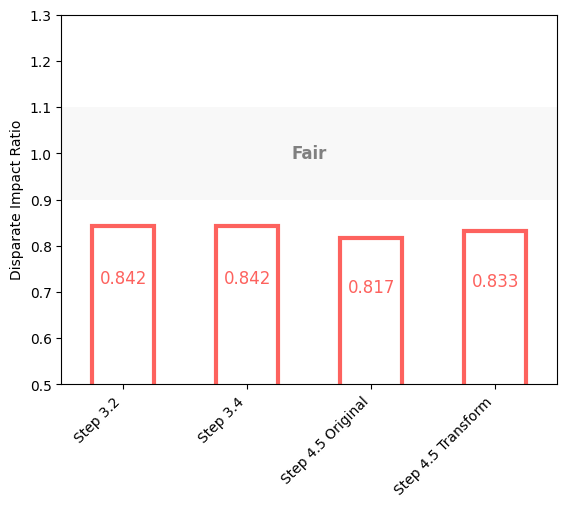

In [64]:
# Create a figure and axes
fig, ax = plt.subplots()

bar_width = 0.5

x_positions = range(len(x))

color_red = '#fd625e'
color_blue = '#01b8aa'

# Plot the bar chart
bar_chart = ax.bar(x_positions, dir_ywang, color='None', width=bar_width, edgecolor = color_red, linewidth = 3)

# Add labels to the bars with y-values at the center
for i, rect in enumerate(bar_chart):
    height = rect.get_height()
    ax.annotate(f'{round(dir_ywang[i], 3)}', xy=(rect.get_x() + rect.get_width() / 2, height/1.2), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', fontsize=12, color=color_red)

# Add a shaded area for y-values between 0.9 and 1.1
ax.axhspan(0.9, 1.1,facecolor='gray', alpha=0.05)
# Add 'Fair' text in the middle of the shaded area
fair_y = (0.9 + 1.1) / 2
ax.text(len(x) / 2 - 0.5, fair_y, 'Fair', ha='center', va='center', fontsize=12, fontweight='bold', color='grey')

ax.set_ylabel('Disparate Impact Ratio')

ax.set_xticks(x_positions)
ax.set_xticklabels(x, rotation=45, ha='right')

ax.set_xlim(-bar_width, len(x) - bar_width)

ax.set_ylim(0.5, 1.3)

plt.savefig('./step5_dir_ywang.jpg', bbox_inches='tight', dpi = 600)

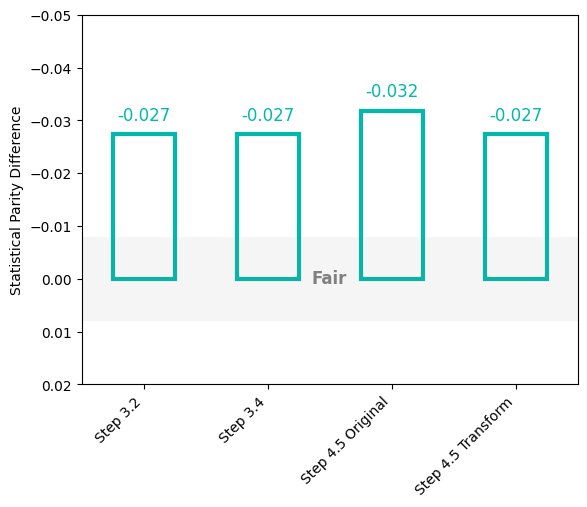

In [65]:
# Create a figure and axes
fig, ax = plt.subplots()
bar_width = 0.5
x_positions = range(len(x))
color_red = '#fd625e'
color_blue = '#01b8aa'
bar_chart = ax.bar(x_positions, spd_ywang, color='None', width=bar_width, edgecolor = color_blue, linewidth = 3)
for i, rect in enumerate(bar_chart):
    height = rect.get_height()
    ax.annotate(f'{round(spd_ywang[i], 3)}', xy=(rect.get_x() + rect.get_width() / 2, height/0.96), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', fontsize=12, color=color_blue)

ax.axhspan(-0.008, 0.008, facecolor='gray', alpha=0.08)
fair_y = 0
ax.text(len(x) / 2 - 0.5, fair_y, 'Fair', ha='center', va='center', fontsize=12, fontweight='bold', color='grey')
ax.set_ylabel('Statistical Parity Difference')

ax.set_xticks(x_positions)
ax.set_xticklabels(x, rotation=45, ha='right')
ax.set_xlim(-bar_width, len(x) - bar_width)
ax.set_ylim(-0.05, 0.02)

# Reverse the y-axis
ax.invert_yaxis()

plt.savefig('./step5_spd_ywang.jpg', bbox_inches='tight', dpi = 600)